# <center>CPE 232 Data Models</center>
# <center>Bank Customer Churn Prediction</center>
<center>64070501049 นาย สรวิชญ์ โมกไธสง</center>
<center>64070501062 นาย ณัฐชนน คำมณี</center>
<center>64070501084 นาย วรพล แซ่คู</center>

# 1. Load data

In [1]:
import pandas as pd
pd.set_option('display.max_columns',500)

df = pd.read_csv('Banking_churn.csv', index_col=0)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619 points,France,Female,42 years,2 years,NaN,1,1,1,101348.88$,1
15647311,Hill,608 points,Spain,Female,41 years,1 years,83807.86$,1,0,1,112542.58$,0
15619304,Onio,502 points,France,Female,42 years,8 years,159660.8$,3,1,0,113931.57$,1
15701354,Boni,699 points,France,Female,39 years,1 years,NaN,2,0,0,93826.63$,0
15737888,Mitchell,850 points,Spain,Female,43 years,2 years,125510.82$,1,1,1,79084.1$,0


# 2. Clean data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Surname          10000 non-null  object
 1   CreditScore      10000 non-null  object
 2   Geography        10000 non-null  object
 3   Gender           10000 non-null  object
 4   Age              10000 non-null  object
 5   Tenure           10000 non-null  object
 6   Balance          6383 non-null   object
 7   NumOfProducts    10000 non-null  int64 
 8   HasCrCard        10000 non-null  int64 
 9   IsActiveMember   10000 non-null  int64 
 10  EstimatedSalary  10000 non-null  object
 11  Exited           10000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1015.6+ KB


In [3]:
df['Balance'] = df['Balance'].str.replace('$', '')
df['EstimatedSalary'] = df['EstimatedSalary'].str.replace('$', '')
df=df.fillna(0)

C:\Users\mrkan\AppData\Local\Temp\ipykernel_11820\3618523381.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Balance'] = df['Balance'].str.replace('$', '')
C:\Users\mrkan\AppData\Local\Temp\ipykernel_11820\3618523381.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['EstimatedSalary'] = df['EstimatedSalary'].str.replace('$', '')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Surname          10000 non-null  object
 1   CreditScore      10000 non-null  object
 2   Geography        10000 non-null  object
 3   Gender           10000 non-null  object
 4   Age              10000 non-null  object
 5   Tenure           10000 non-null  object
 6   Balance          10000 non-null  object
 7   NumOfProducts    10000 non-null  int64 
 8   HasCrCard        10000 non-null  int64 
 9   IsActiveMember   10000 non-null  int64 
 10  EstimatedSalary  10000 non-null  object
 11  Exited           10000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1015.6+ KB


In [5]:
df['CreditScore'] = df['CreditScore'].str.replace(' points', '')
df['Age'] = df['Age'].str.replace(' years', '')
df['Tenure'] = df['Tenure'].str.replace(' years', '')
df[['Tenure',  'Age','CreditScore']] = df[['Tenure','Age','CreditScore']].astype(str).apply(pd.to_numeric, errors='coerce').astype('int64')
df[[ 'Balance', 'EstimatedSalary']] = df[[ 'Balance', 'EstimatedSalary']].astype(str).apply(pd.to_numeric, errors='coerce').astype('float64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# 3. Data preparation

In [7]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')
df_object.drop(['Surname'], axis=1, inplace=True)
df_object_num = pd.get_dummies(df_object, drop_first=True)
df_prep = pd.concat([df_num, df_object_num], axis=1)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 810.5 KB


# 4. Data visualization

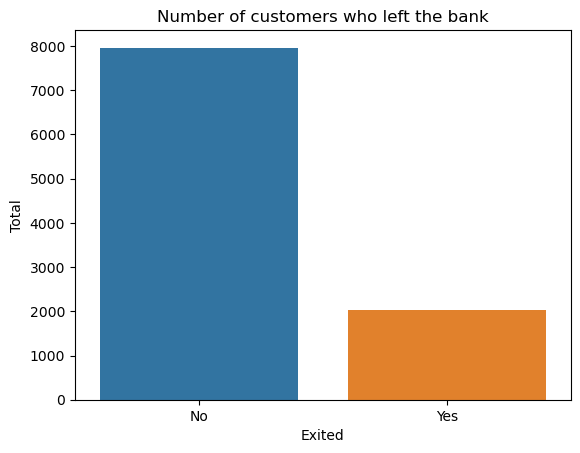

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Exited', data=df)
plt.title('Number of customers who left the bank')
plt.xlabel('Exited')
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Total')
plt.show()

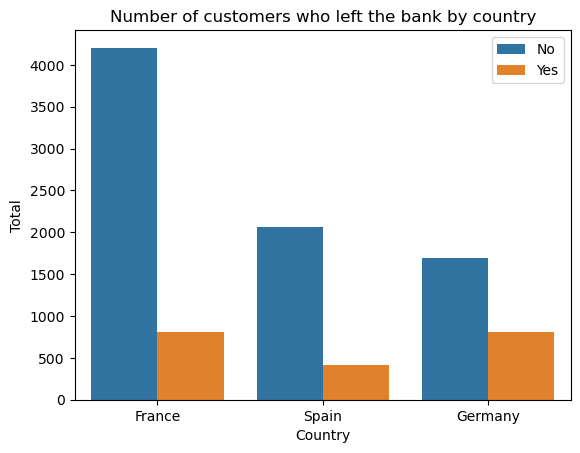

In [9]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.legend(['No', 'Yes'])
plt.title('Number of customers who left the bank by country')
plt.xlabel('Country')
plt.ylabel('Total')
plt.show()

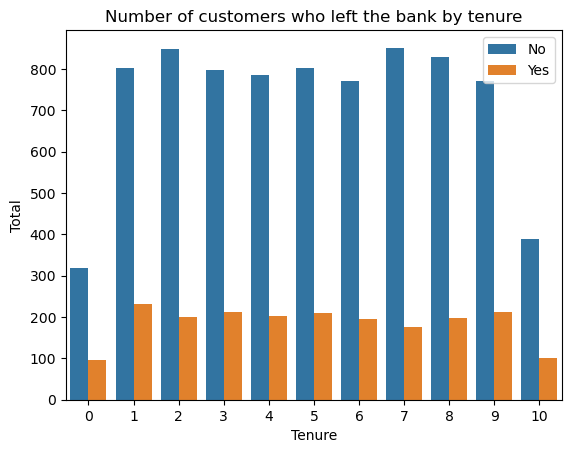

In [10]:
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.legend(['No', 'Yes'])
plt.title('Number of customers who left the bank by tenure')
plt.xlabel('Tenure')
plt.ylabel('Total')
plt.show()

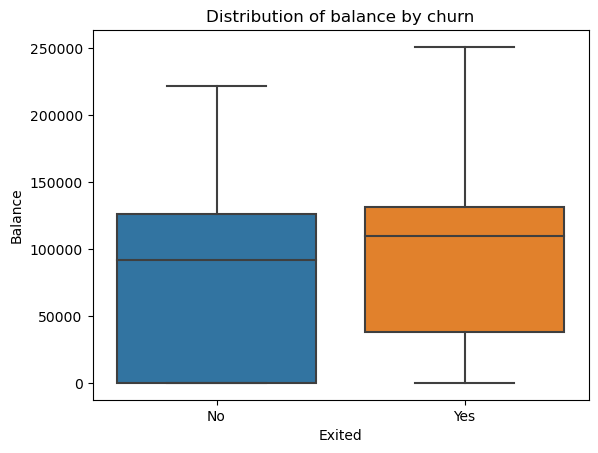

In [11]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Distribution of balance by churn')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

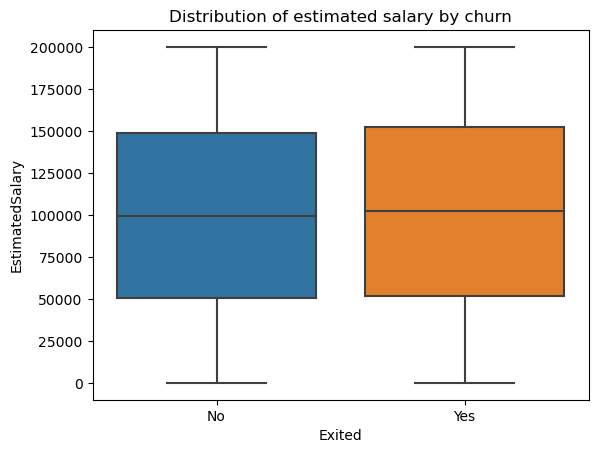

In [12]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Distribution of estimated salary by churn')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

C:\Users\mrkan\AppData\Local\Temp\ipykernel_11820\2527817271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins)


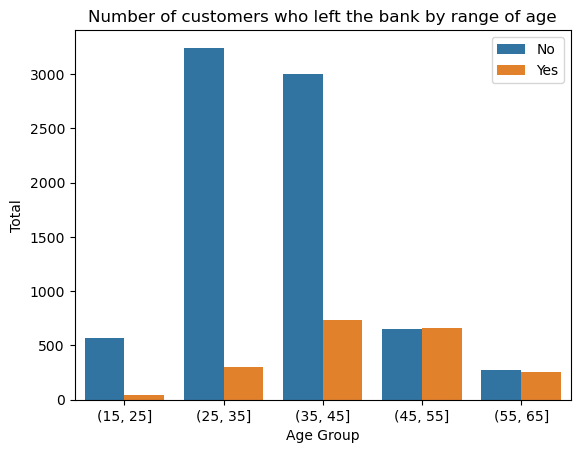

In [13]:
filtered_df = df[(df['Age'] >= 15) & (df['Age'] <= 70)]
age_bins = list(range(15, 71,10))
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins)
sns.countplot(x='Age Group', hue='Exited', data=filtered_df)
plt.title('Number of customers who left the bank by range of age')
plt.xlabel('Age Group')
plt.ylabel('Total')
plt.legend(title='Exited', loc='upper right')
plt.legend(['No', 'Yes'])
plt.show()

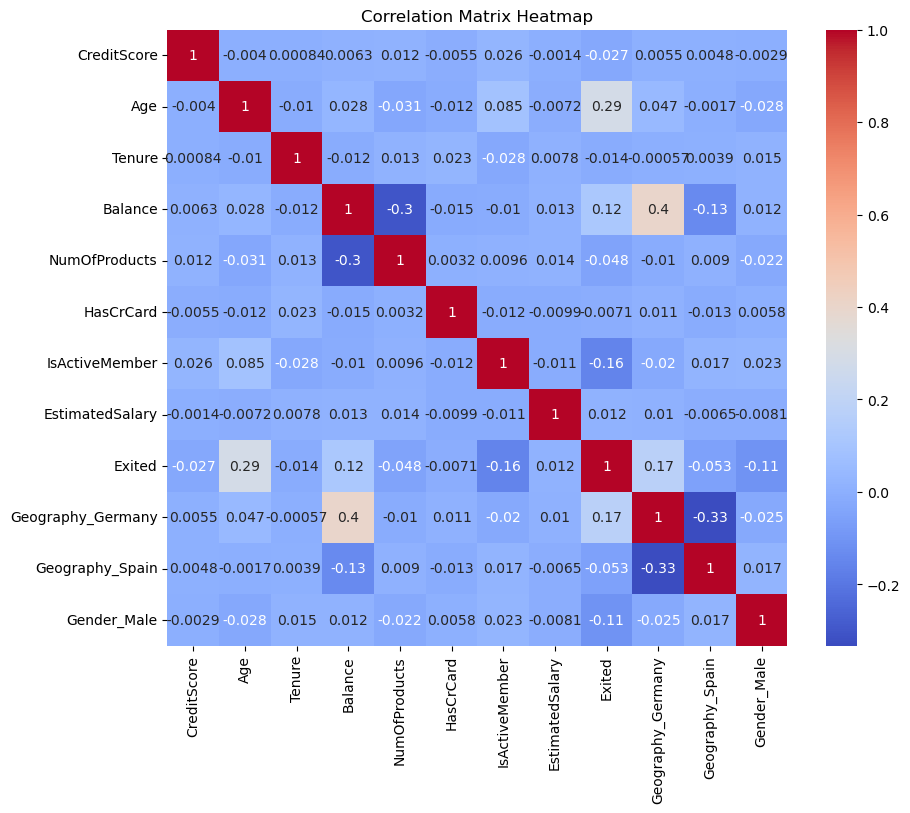

In [14]:
correlation_matrix = df_prep.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()S

# 5. Train a decision by random forest

In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_prep, train_size = 0.7)
X_train = df_train.drop(['Exited'], axis=1)
y_train = df_train['Exited']

X_test = df_test.drop(['Exited'], axis=1)
y_test = df_test['Exited']

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# 6. Variable importance

In [17]:
df_train.columns[:-1]

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [18]:
rf.feature_importances_

array([0.14487002, 0.23866825, 0.0802187 , 0.14226788, 0.12473571,
       0.01937742, 0.04326285, 0.14740706, 0.02681932, 0.01364287,
       0.01872992])

In [19]:
pd.DataFrame(dict(Feature=df_train.columns[:-1],
                  Value=rf.feature_importances_))\
  .sort_values(by='Value', ascending=False)

,Feature,Value
1,Age,0.238668
7,EstimatedSalary,0.147407
0,CreditScore,0.144870
3,Balance,0.142268
4,NumOfProducts,0.124736
2,Tenure,0.080219
6,IsActiveMember,0.043263
8,Exited,0.026819
5,HasCrCard,0.019377
10,Geography_Spain,0.018730


# 7. Prediction

In [20]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
rf.predict_proba(X_test)

array([[0.99, 0.01],
       [0.79, 0.21],
       [0.98, 0.02],
       ...,
       [0.93, 0.07],
       [0.99, 0.01],
       [0.79, 0.21]])

In [22]:
print("Test set accuracy = " + str(rf.score(X_test, y_test)))

Test set accuracy = 0.868


# 8. Classification report

In [23]:
from sklearn.metrics import classification_report

In [24]:
res = rf.predict(X_test)
print(classification_report(y_true=y_test.values, y_pred=res))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.50      0.61       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [33]:
cs = pd.crosstab(df_prep['Exited'], columns='p', normalize=True)
cs.rename(index={0: 'No', 1: 'Yes'})

col_0,p
Exited,
No,0.7963
Yes,0.2037


In [30]:
cm = pd.crosstab(index=res,columns=y_test)
cm.rename(columns={0: 'Actual Positive', 1: 'Actual Negative'}, index={0: 'Predict Positive', 1: 'Predict Negative'})

Exited,Actual Positive,Actual Negative
row_0,,
Predict Positive,2297,304
Predict Negative,92,307
